# Programmieraufgabe I                                              (9 + 8 + 4 + 4 = 25 Punkte)
## _Abgabe in der Woche vom 5. bis 9. November_

In [27]:
import numpy as np 
import matplotlib.pyplot as plt

Die grundlegenden Operationen der linearen Algebra (d.h. Summen, Skalarprodukte, Norm, Matrix-Vektor-Produkt, etc.) sind sind für numpy-arrays bereits implementiert und dürfen hier verwendet werden. 

## Teilaufgabe a)

Implementieren Sie eine Funktion, die als Input ein Matrix $A$ (als numpy-array) erhält und die reduzierte QR-Zerlegung ($\hat{Q}$, $\hat{R}$ jeweils als numpy-arrays) zurückgibt. Als Subroutine empfiehlt es sich, die Anwendung der Householder-Transformation separat zu implementieren.


In [28]:
def myqr(A): 
    
    ## Diese Funktion soll die reduzierte QR-Zerlegung von A berechnen und Q,R (in der Vorlesung $\hat{Q}, \hat{R}$) zurückgeben...
    
    (num_rows, num_cols) = np.shape(A)
    
    ## Initialisiere Q und R
    Q = np.identity(num_rows)
    R = np.copy(A)
    
    
    ## Bilde nach und nach Teilspaltenvektoren von A auf Vielfache des ersten Einheitsvektors ab
    for i in range(num_cols):
        
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.sign(x[0])*np.linalg.norm(x)
        v = x + e
        w = v / np.linalg.norm(v)
        
        
        ## Nun ist das passende w berechnet, und R wird mittels Householder Transformiert, Q wird neu berechnet
        (R, H) = householder(R, w)
        R[i+1:,i] = np.zeros_like(R[i+1:,i])
        Q = np.dot(Q, H.T)
        
    
    ##print("Probe vor Reduzieren von Q: Q*Q.T =\n", np.dot(Q, Q.T), "\n")
                                                                           
    Q = Q[:, :num_cols]
    R = R[:num_cols, :]
    return (Q,R)

def householder(arg, w): 
    
    ## Diese Funktion soll eine Householder-Transformation $I - 2ww^T$ auf das Argument arg (Matrix oder Vektor) anwenden.
    
    l = len(w)
    
    ## Berechne I - 2ww^T
    H_ = np.identity(l)
    for i in range(l):
        for j in range(l):
            H_[i][j] -= 2*w[i]*w[j]
    
    (num_rows, num_cols) = np.shape(arg)
    
    #Bringe die Matrix für die Householder-Transformation auf passende Größe indem H_ in die rechte untere Ecke einer sonst Einheitsmatrix kommt
    H = np.identity(num_rows)
    H[num_rows-l:, num_rows-l:] = H_
    
    ## Führe Householder-Transformation auf arg aus
    result = H@arg
    
    return (result, H)


Testen Sie Ihre eigene Implementierung, indem Sie eine zufällige $5 \times 4$-Matrix erzeugen und deren mit Ihrer Implementierung generierte QR-Zerlegung mit der in numpy bereits implementierten QR-Zerlegung vergleichen.

In [30]:

## Hinweis: Verwenden Sie die Generierung zufälliger Matrizen aus numpy... 
## Ein paar Tests zu Teilaufgabe a)
A = np.random.rand(5,4)

print("Matrix A:\n", A, "\n")

(Q, R) = myqr(A)
print("Matrix Q:\n", Q, "\n")
print("Matrix R:\n", R, "\n")
print("Probe: Q*R = \n", np.dot(Q, R), "\n\n")

(Q_, R_) = np.linalg.qr(A)
print("Python Q-R-Zerlegung:\nQ:\n", Q_, "\nR:\n", R_, "\n")

print("Abweichung von Q und R im Vgl. zu Python:\nAbweichung Q:\n", Q-Q_, "\nAbweichung R:\n", R-R_)


Matrix A:
 [[ 0.8421457   0.95356904  0.3599108   0.51250273]
 [ 0.16492855  0.73381476  0.60209708  0.93785506]
 [ 0.88120508  0.94388     0.76951415  0.7408848 ]
 [ 0.57122643  0.50546254  0.06948756  0.42150169]
 [ 0.21829669  0.23174212  0.92842463  0.03528832]] 

Matrix Q:
 [[-0.61307608 -0.0325823   0.28427068  0.7344949 ]
 [-0.12006681 -0.97121331  0.01724095 -0.1592491 ]
 [-0.64151103  0.06099617 -0.21057617 -0.40730027]
 [-0.41584878  0.22717806  0.24560987 -0.48199699]
 [-0.15891844  0.01877996 -0.90234495  0.19220396]] 

Matrix R:
 [[-1.37363979 -1.52525068 -0.9630365  -1.08298314]
 [ 0.         -0.56700496 -0.51633218 -0.78594606]
 [ 0.          0.         -0.87004098  0.07752906]
 [ 0.          0.          0.         -0.2710645 ]] 

Probe: Q*R = 
 [[ 0.8421457   0.95356904  0.3599108   0.51250273]
 [ 0.16492855  0.73381476  0.60209708  0.93785506]
 [ 0.88120508  0.94388     0.76951415  0.7408848 ]
 [ 0.57122643  0.50546254  0.06948756  0.42150169]
 [ 0.21829669  0.23174212

## Teilaufgabe b) 


Implementieren Sie die QR-basierte Lösungsstrategie für das Least-Squares Problem $\min_x \lVert Ax - b \rVert$: Die Funktion soll als Input die Matrix $A$ und den Vektor $b$ (beide als numpy-array) erhalten und die Lösung $x_{\min}$ zurückgegebn. 

Die Lösung eines Gleichungsystems mit oberer Dreiecksstruktur sollen Sie als eigene Routine programmieren. (Der lineare Löser aus numpy soll hier nicht verwendet werden.)

In [31]:
def myuppertriangularsolver(A,b):
    
    ## Löst die Gleichung Ax = b, wobei A eine obere Dreiecksmatrix mit strikt positiven Diagonalementen ist. ##
    
    n = len(b)
    x = np.zeros_like(b)
    
    for i in range (n-1, -1, -1):
        sum = 0
        for j in range (i+1, n):
            sum += A[i][j]*x[j]
        x[i] = 1/A[i][i] * (b[i] - sum)
    
    return x


def myleastsquares(A,b):
    
    ## Löst das least squares problem $min_x \lVert Ax-b \rVert_2$.
    
    (num_rows, num_cols) = np.shape(A)
    
    (Q, R) = myqr(A)
    Qtb = np.dot(Q.T, b)
    
    xmin = myuppertriangularsolver(R, Qtb)
    
    return xmin

Testen Sie Ihre Implementierung an Aufgabe 1b) von Übungsblatt Nr. 2: 

In [32]:
b = np.array([2, 3, 3, -2])
A = np.array([[1, -2, 4], [1, -1, 1], [1,1,1], [1,2,4]])
xtrue=np.array([4, -4./5, -1])

## Test: ...
## Test zu Teilaufgabe b)
b = np.array([2, 3, 3, -2])
C = np.array([[1, -2, 4], [1, -1, 1], [1,1,1], [1,2,4]])
xtrue=np.array([4, -4./5, -1])


print("\nTest b): Lösen der Aufgabe 1b von Blatt 2:\n", myleastsquares(C, b))


Test b): Lösen der Aufgabe 1b von Blatt 2:
 [ 4.  -0.8 -1. ]


## Teilaufgabe c) 

Es sei das Interval $I = (0,1)$ gegeben. Die folgende Funktion gibt einen Vektor von $x-$Werten aus $I$ sowie die geringfügig zufällig gestörten zugehörigen $y-$Werte $y \approx f(x)$ zurück.

In [21]:
def noisyfunction(fun, numberofpoints, noisemax):
    xvals = np.random.rand(numberofpoints)
    yvals = np.zeros(numberofpoints)
    for k in range(numberofpoints):
        yvals[k] = fun(xvals[k]) + 2*noisemax*(np.random.rand()-0.5)
    return xvals, yvals

Es sei eine Funktion $F: \mathbb{R} \times \mathbb{N} \rightarrow \mathbb{R}$ gegeben, z.B. $F_{\text{Pol}}(x,l) := x^l$ oder $F_{\sin}(x,l) = \sin(\pi lx)$, derart, dass durch $f_l(x) := F(x,l)$ eine "sinnvolle" Familie von Basisfunktionen definiert wird. 

Für gegebene Datenpunkte $(x_1, y_1), ..., (x_m, y_m)$ und $n \in \mathbb{N}$ wollen wir einen Koeffizientenvektor $c = (c_0, ..., c_n)$ bestimmen, der das Least-Squares Problem
$\min_{c \in \mathbb{R}^n} \sum_{k=1}^m \left| \sum_{l=1}^n c_l f_l(x_k) - y_k \right|^2 $ löst. Schreiben Sie dazu die Funktion "myregression" mit folgenden Inputs: 
* xvals, yvals: Arrays mit den gegebenen Wertepaaren
* funfamily: Funktion $F$ für die Erzeugung der Basisfunktionen (siehe oben)
* degree: entspricht $n$, der Anzahl der verwendeten Basisfunktionen
* xtoevaluate: array mit $x-$Werten, an denen die gefundene Regressions-Lösung ausgewertet werden soll

Ausgegeben werden soll der Koeffizientenvektor coeffvec sowie die Auswertung y der Regressions-Lösung an den in xtoevaluate gegebenen x-Werten.

In [33]:
def myregression(xvals, yvals, funfamily, degree, xtoevaluate):
    
    y = np.zeros_like(xtoevaluate)
    A = np.zeros(shape=(len(xvals), degree))
    
    for i in range (len(xvals)):
        for j in range (degree):
            A[i][j] = funfamily(xvals[i], j)
    
    coeffvec = myleastsquares(A, yvals)
    
    for i in range (len(xtoevaluate)):
        ev = 0
        for j in range (degree):
            ev += coeffvec[j]*funfamily(xtoevaluate[i], j)
        y[i] = ev

    return y, coeffvec


## Implementierung der Basis-Familien $F_Pol$ bzw. $F_sin$ von oben: 
def polynomialfamily(x,l):
    return x**l

def sinefamily(x,l):
    return np.sin(np.pi*x*(l+1))

## Teilaufgabe d) 

Testen Sie Ihre Implementierung für die Lösung des Least-Squares Problems mit den unten erzeugten Wertepaaren: 

* Plotten Sie dazu jeweils die verrauschten Wertepaare sowie die Regressionsfunktion.  

* Variieren Sie die Anzahl der Basisfunktionen bzw. die Wahl der Familie von Basisfunktionen.  

Erklären Sie, weshalb die Lösung des Least-Squares Problems für die Approximation von $x-\frac{1}{2}$ mittels Sinus-Schwingungen sehr viel instabiler zu sein scheint als die Approximation des Sinus mit Polynomen.

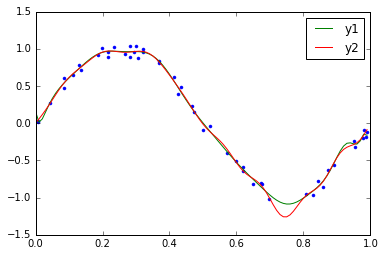

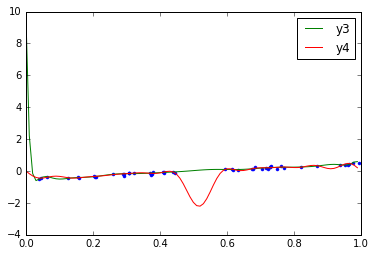

In [35]:
def fun_1(x):
    return np.sin(2*np.pi*x)

def fun_2(x):
    return x-0.5

## Tests Aufgabe d)
xvals_1,yvals_1=noisyfunction(fun_1, 50, 0.1)
xvals_2, yvals_2 = noisyfunction(fun_2, 50, 0.1)
degree = 20
values = 100

xtoevaluate = np.zeros(values)
for i in range (values):
    xtoevaluate[i] = i/values
               
(y1, coeffvec1) = myregression(xvals_1, yvals_1, polynomialfamily, degree, xtoevaluate)
(y2, coeffvec2) = myregression(xvals_1, yvals_1, sinefamily, degree, xtoevaluate)
(y3, coeffvec3) = myregression(xvals_2, yvals_2, polynomialfamily, degree, xtoevaluate)
(y4, coeffvec4) = myregression(xvals_2, yvals_2, sinefamily, degree, xtoevaluate)

plt.plot(xvals_1, yvals_1, '.')
plt.plot(xtoevaluate, y1, '-', label = 'y1')
plt.plot(xtoevaluate, y2, '-', label = 'y2')
plt.legend()
plt.show()
plt.close()

plt.plot(xvals_2, yvals_2, '.')
plt.plot(xtoevaluate, y3, '-', label = 'y3')
plt.plot(xtoevaluate, y4, '-', label = 'y4')
plt.legend()
plt.show()
plt.close()

